<div align="center">

# Обнаружение областей высокой плотности с помощью DBSCAN

</div>

---

## DBSCAN — (Density-Based Spatial Clustering of Applications with Noise, Пространственная Кластеризация зашумленных приложений на основе плотности)

### Основная идея

* Кластеризация **на основе плотности** точек, а не на основе центроидов.
* Не требует:

  * сферической формы кластеров (в отличие от k-средних),
  * ручного задания иерархий (в отличие от иерархической кластеризации).
* **Плотность** = количество точек внутри радиуса $\varepsilon$ вокруг точки.

### Классификация точек

| Тип точки                  | Условие                                                                 |
| -------------------------- | ----------------------------------------------------------------------- |
| **Core point (ядро)**      | ≥ MinPts точек в радиусе $\varepsilon$                                  |
| **Border point (граница)** | < MinPts точек в радиусе $\varepsilon$, но находится рядом с core point |
| **Noise point (шум)**      | Не относится ни к core, ни к border точкам                              |


### Алгоритм DBSCAN (шаги)

1. **Формирование кластеров из core points**

   * Core points, находящиеся друг от друга на расстоянии ≤ $\varepsilon$, объединяются в кластер.
2. **Назначение border points**

   * Граничные точки присваиваются кластеру ближайшей core point.

* Шумовые точки остаются без кластера (отсечение шумовых данных).

### Основные преимущества

* Не требует заранее задавать количество кластеров.
* Подходит для **кластеров любой формы** (не обязательно сферических).
* Автоматически выделяет **шумовые точки**, которые не принадлежат ни к одному кластеру.


 **Интуиция:**

* Представь карту с группами людей:

  * **Core points** — люди в центре плотной группы,
  * **Border points** — люди на краю группы,
  * **Noise points** — одиночки, далеко от всех.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

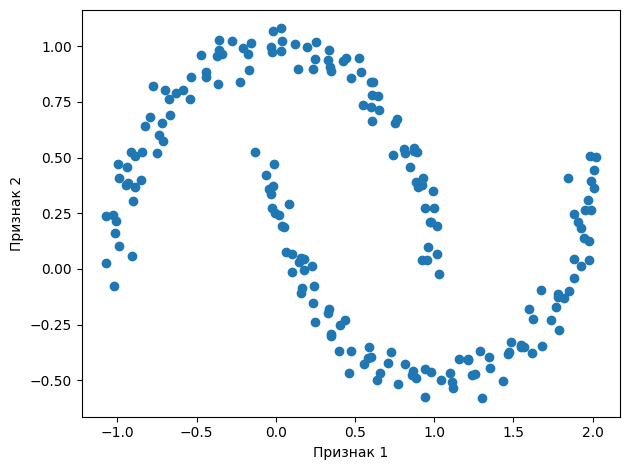

In [4]:
# Демонстрационный набор данных серповидной формы
X, y = make_moons(n_samples = 200,
                  noise = 0.05,
                  random_state = 0)
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.tight_layout()
plt.show()

На полученном графике отчетливо видно две группы в форме полумесяцев, состоящей из 100 примеров каждая.

---

Сравним алгоритм **k-средних**, **иерархическую кластеризацию (полной связи)** и **DBSCAN**, чтобы проверить, может ли один из рассмотренных алгоритмов кластеризации идентифицировать группы серповидной формы как отдельные кластеры.

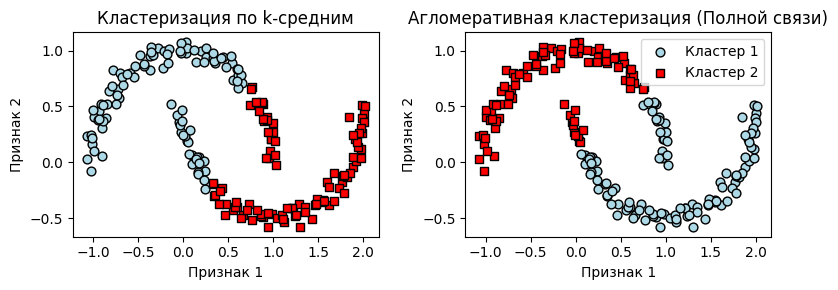

In [7]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 3))
km = KMeans(n_clusters = 2,
            random_state = 0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            c = 'lightblue',
            edgecolor = 'black',
            marker = 'o',
            s = 40,
            label = 'Кластер 1')
ax1.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            c = 'red',
            edgecolor = 'black',
            marker = 's',
            s = 40,
            label = 'Кластер 2')
ax1.set_title('Кластеризация по k-средним')
ax1.set_xlabel('Признак 1')
ax1.set_ylabel('Признак 2')

ac = AgglomerativeClustering(n_clusters = 2,
                             metric = 'euclidean',
                             linkage = 'complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0],
            X[y_ac == 0, 1],
            c = 'lightblue',
            edgecolor = 'black',
            marker = 'o',
            s = 40,
            label = 'Кластер 1')
ax2.scatter(X[y_ac == 1, 0],
            X[y_ac == 1, 1],
            c = 'red',
            edgecolor = 'black',
            marker = 's',
            s = 40,
            label = 'Кластер 2')
ax2.set_title('Агломеративная кластеризация (Полной связи)')
ax2.set_xlabel('Признак 1')
ax2.set_ylabel('Признак 2')
plt.legend()
plt.tight_layout()
plt.show()

Как видно на графиках, алгоритм **k-средних** и **иерархической** кластеризации не смогли разделить эти два кластера , слишком сложные формы.
Применим алгоритм **DBSCAN** и посмотрим сможет ли он распознать два скопления точек в форме полумесяцев, используя подход на основе плотности.

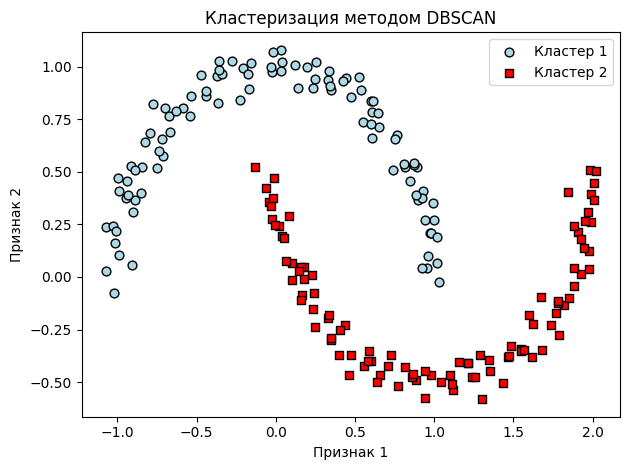

In [12]:
db = DBSCAN(eps = 0.2,
            min_samples = 5,
            metric = 'euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0],
            X[y_db == 0, 1],
            c = 'lightblue',
            edgecolor = 'black',
            marker = 'o',
            s = 40,
            label = 'Кластер 1')
plt.scatter(X[y_db == 1, 0],
            X[y_db == 1, 1],
            c = 'red',
            edgecolor = 'black',
            marker = 's',
            s = 40,
            label = 'Кластер 2')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Кластеризация методом DBSCAN')
plt.legend()
plt.tight_layout()
plt.show()

>Алгоритм **DBSCAN** успешно распознал группы точек в форме полумесяцев, что подчеркивает одну из сильных сторон этого алгоритма - кластеризацию данных произвольной формы.

Недостатки DBSCAN:

* **Проклятие размерности:** при увеличении числа признаков эффективность падает, особенно с евклидовой метрикой.
* **Общие ограничения:** это касается и k-средних, и иерархической кластеризации.
* **Чувствительность к гиперпараметрам:** MinPts и ε нужно подбирать; разные плотности в данных могут усложнить оптимизацию.

---

### Вывод по рассмотренным методам кластеризации

**Разнообразие алгоритмов:**

   * Мы изучили три основных подхода:

     * **k-средние (на основе прототипов)** — эффективно для сферических кластеров, требует заранее задать k.
     * **Иерархическая кластеризация** — не требует k, результат удобно интерпретировать через дендрограмму.
     * **DBSCAN (на основе плотности)** — выявляет кластеры произвольной формы, умеет отделять шумовые точки, но чувствителен к гиперпараметрам и проклятию размерности.
   * Существуют и более сложные методы, например, **графовая кластеризация (спектральная)**, использующая собственные векторы матриц сходства для выделения кластеров.

**Оценка качества кластеризации:**

   * Поскольку это обучение без учителя, **нельзя использовать метки классов**.
   * Для оценки применяются **внутренние метрики**: SSE (inertia), метод локтя, силуэтный коэффициент.

**Практические рекомендации:**

   * Успех кластеризации зависит не только от алгоритма, но и от **выбора метрики расстояния и знания предметной области**.
   * Для многомерных данных рекомендуется **уменьшать размерность** (PCA, t-SNE) для ускорения алгоритмов и визуализации результатов.
   * Визуализация в 2D помогает оценить распределение кластеров и корректность выделения групп.

**Итог:**

   * Нет универсального алгоритма для всех задач — выбор зависит от **формы кластеров, наличия шума, количества признаков и цели анализа**.
   * Комбинация подходящего алгоритма, правильных параметров и метрик качества позволяет **эффективно выявлять скрытую структуру данных**.